In [ ]:
!apt-get install -qq libproj-dev proj-data proj-bin libgeos-dev

Selecting previously unselected package proj-bin.
(Reading database ... 120893 files and directories currently installed.)
Preparing to unpack .../proj-bin_8.2.1-1_amd64.deb ...
Unpacking proj-bin (8.2.1-1) ...
Setting up proj-bin (8.2.1-1) ...
Processing triggers for man-db (2.10.2-1) ...


In [ ]:
!pip install cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 4.3 MB/s eta 0:00:00


In [ ]:
import cartopy.crs as ccrs
import sys
import numpy as np
from scipy import signal
from scipy.stats import percentileofscore, norm
import datetime as dt
import matplotlib.pyplot as pl
import matplotlib.dates as mdates
from itertools import product
from scipy.ndimage import uniform_filter1d

In [ ]:
mems = ['r1i1p1f2', 'r2i1p1f2', 'r3i1p1f2', 'r4i1p1f2', 'r5i1p1f2', 'r6i1p1f2', 'r7i1p1f2', 'r8i1p1f2', 'r9i1p1f2']

In [ ]:
for mem in mems:
    !wget http://esgf-data02.diasjp.net/thredds/fileServer/esg_dataroot/CMIP6/VolMIP/MIROC/MIROC-ES2L/volc-long-eq/{mem}/Amon/pr/gn/v20210118/pr_Amon_MIROC-ES2L_volc-long-eq_{mem}_gn_185004-187012.nc
    !wget http://esgf-data02.diasjp.net/thredds/fileServer/esg_dataroot/CMIP6/VolMIP/MIROC/MIROC-ES2L/volc-long-eq/{mem}/Amon/tas/gn/v20210118/tas_Amon_MIROC-ES2L_volc-long-eq_{mem}_gn_185004-187012.nc
#    !wget http://esgf-data02.diasjp.net/thredds/fileServer/esg_dataroot/CMIP6/VolMIP/MIROC/MIROC-ES2L/volc-long-eq/{mem}/AERmon/od550so4/gn/v20210118/od550so4_AERmon_MIROC-ES2L_volc-long-eq_{mem}_gn_185004-187012.nc

--2023-09-05 17:06:52--  http://esgf-data02.diasjp.net/thredds/fileServer/esg_dataroot/CMIP6/VolMIP/MIROC/MIROC-ES2L/volc-long-eq/r1i1p1f2/Amon/pr/gn/v20210118/pr_Amon_MIROC-ES2L_volc-long-eq_r1i1p1f2_gn_185004-187012.nc
Resolving esgf-data02.diasjp.net (esgf-data02.diasjp.net)... 157.1.137.53
Connecting to esgf-data02.diasjp.net (esgf-data02.diasjp.net)|157.1.137.53|:80... connected.
HTTP request sent, awaiting response... 200 200
Length: 6566493 (6.3M) [application/x-netcdf]
Saving to: ‘pr_Amon_MIROC-ES2L_volc-long-eq_r1i1p1f2_gn_185004-187012.nc’

pr_Amon_MIROC-ES2L_ 100%[===================>]   6.26M  4.78MB/s    in 1.3s    

2023-09-05 17:06:54 (4.78 MB/s) - ‘pr_Amon_MIROC-ES2L_volc-long-eq_r1i1p1f2_gn_185004-187012.nc’ saved [6566493/6566493]

--2023-09-05 17:06:54--  http://esgf-data02.diasjp.net/thredds/fileServer/esg_dataroot/CMIP6/VolMIP/MIROC/MIROC-ES2L/volc-long-eq/r1i1p1f2/Amon/tas/gn/v20210118/tas_Amon_MIROC-ES2L_volc-long-eq_r1i1p1f2_gn_185004-187012.nc
Resolving esgf-da

In [ ]:
import xarray as xr
ds_pr_volc_long_eq  = xr.open_mfdataset('pr_Amon_MIROC-ES2L_volc-long-eq*.nc', combine='nested', concat_dim='ensemble').mean(dim='ensemble')
ds_tas_volc_long_eq = xr.open_mfdataset('tas_Amon_MIROC-ES2L_volc-long-eq*.nc', combine='nested', concat_dim='ensemble').mean(dim='ensemble')
#ds_aod = xr.open_mfdataset('od550so4_*.nc', combine='nested', concat_dim='ensemble').mean(dim='ensemble').to_netcdf('aod_Amon_MIROC-ES2L_volc-long-eq_ensmean_gn_185004-187012.nc')

In [ ]:
#!rm -rf pr_Amon_MIROC-ES2L_volc-long-eq_r*.nc tas_Amon_MIROC-ES2L_volc-long-eq_r*.nc od550*.nc

# PI control

In [ ]:
vars = ['pr', 'tas']
for var in vars:
    !wget http://esgf-data02.diasjp.net/thredds/fileServer/esg_dataroot/CMIP6/CMIP/MIROC/MIROC-ES2L/piControl/r1i1p1f2/Amon/{var}/gn/v20190823/{var}_Amon_MIROC-ES2L_piControl_r1i1p1f2_gn_185001-204912.nc
    !wget http://esgf-data02.diasjp.net/thredds/fileServer/esg_dataroot/CMIP6/CMIP/MIROC/MIROC-ES2L/piControl/r1i1p1f2/Amon/{var}/gn/v20190823/{var}_Amon_MIROC-ES2L_piControl_r1i1p1f2_gn_205001-224912.nc
    !wget http://esgf-data02.diasjp.net/thredds/fileServer/esg_dataroot/CMIP6/CMIP/MIROC/MIROC-ES2L/piControl/r1i1p1f2/Amon/{var}/gn/v20190823/{var}_Amon_MIROC-ES2L_piControl_r1i1p1f2_gn_225001-234912.nc

--2023-09-05 17:07:31--  http://esgf-data02.diasjp.net/thredds/fileServer/esg_dataroot/CMIP6/CMIP/MIROC/MIROC-ES2L/piControl/r1i1p1f2/Amon/pr/gn/v20190823/pr_Amon_MIROC-ES2L_piControl_r1i1p1f2_gn_185001-204912.nc
Resolving esgf-data02.diasjp.net (esgf-data02.diasjp.net)... 157.1.137.53
Connecting to esgf-data02.diasjp.net (esgf-data02.diasjp.net)|157.1.137.53|:80... connected.
HTTP request sent, awaiting response... 200 200
Length: 62764652 (60M) [application/x-netcdf]
Saving to: ‘pr_Amon_MIROC-ES2L_piControl_r1i1p1f2_gn_185001-204912.nc’

pr_Amon_MIROC-ES2L_ 100%[===================>]  59.86M  17.3MB/s    in 4.4s    

2023-09-05 17:07:36 (13.6 MB/s) - ‘pr_Amon_MIROC-ES2L_piControl_r1i1p1f2_gn_185001-204912.nc’ saved [62764652/62764652]

--2023-09-05 17:07:36--  http://esgf-data02.diasjp.net/thredds/fileServer/esg_dataroot/CMIP6/CMIP/MIROC/MIROC-ES2L/piControl/r1i1p1f2/Amon/pr/gn/v20190823/pr_Amon_MIROC-ES2L_piControl_r1i1p1f2_gn_205001-224912.nc
Resolving esgf-data02.diasjp.net (esgf-

In [ ]:
!rm -rf *.1
!ls

pr_Amon_MIROC-ES2L_piControl_r1i1p1f2_gn_185001-204912.nc
pr_Amon_MIROC-ES2L_piControl_r1i1p1f2_gn_205001-224912.nc
pr_Amon_MIROC-ES2L_piControl_r1i1p1f2_gn_225001-234912.nc
pr_Amon_MIROC-ES2L_volc-long-eq_r1i1p1f2_gn_185004-187012.nc
pr_Amon_MIROC-ES2L_volc-long-eq_r2i1p1f2_gn_185004-187012.nc
pr_Amon_MIROC-ES2L_volc-long-eq_r3i1p1f2_gn_185004-187012.nc
pr_Amon_MIROC-ES2L_volc-long-eq_r4i1p1f2_gn_185004-187012.nc
pr_Amon_MIROC-ES2L_volc-long-eq_r5i1p1f2_gn_185004-187012.nc
pr_Amon_MIROC-ES2L_volc-long-eq_r6i1p1f2_gn_185004-187012.nc
pr_Amon_MIROC-ES2L_volc-long-eq_r7i1p1f2_gn_185004-187012.nc
pr_Amon_MIROC-ES2L_volc-long-eq_r8i1p1f2_gn_185004-187012.nc
pr_Amon_MIROC-ES2L_volc-long-eq_r9i1p1f2_gn_185004-187012.nc
sample_data
tas_Amon_MIROC-ES2L_piControl_r1i1p1f2_gn_185001-204912.nc
tas_Amon_MIROC-ES2L_piControl_r1i1p1f2_gn_205001-224912.nc
tas_Amon_MIROC-ES2L_piControl_r1i1p1f2_gn_225001-234912.nc
tas_Amon_MIROC-ES2L_volc-long-eq_r1i1p1f2_gn_185004-187012.nc
tas_Amon_MIROC-ES2L_volc-l

In [ ]:
!pip install cftime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 6.4 MB/s eta 0:00:00


In [ ]:
import cftime
ds_pr_piC = xr.open_mfdataset('pr_Amon_MIROC-ES2L_piControl_r1i1p1f2_gn_185001-204912.nc')
ds_tas_piC = xr.open_mfdataset('tas_Amon_MIROC-ES2L_piControl_r1i1p1f2_gn_185001-204912.nc')

In [ ]:
ds_pr_piC

<xarray.Dataset>
Dimensions:    (time: 2400, bnds: 2, lat: 64, lon: 128)
Coordinates:
  * time       (time) datetime64[ns] 1850-01-16T12:00:00 ... 2049-12-16T12:00:00
  * lat        (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 82.31 85.1 87.86
  * lon        (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(2400, 2), meta=np.ndarray>
    lat_bnds   (lat, bnds) float64 dask.array<chunksize=(64, 2), meta=np.ndarray>
    lon_bnds   (lon, bnds) float64 dask.array<chunksize=(128, 2), meta=np.ndarray>
    pr         (time, lat, lon) float32 dask.array<chunksize=(2400, 64, 128), meta=np.ndarray>
Attributes: (12/44)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  -127835.0
    creation_date:          2019-06-28T11:17:37Z
    ...                     ...
    title:                  MIROC-ES2L output prepared for CMIP6
    variable_id:            pr
    variant_label:          r1i1p1f2
    license:                CMIP6 model data produced by MIROC is licensed un...
    cmor_version:           3.3.2
    tracking_id:            hdl:21.14100/dabadc85-f140-4002-8cc3-996d2fb01a4d

In [ ]:
pr_monthly_climatology = ds_pr_piC.pr.groupby('time.month').mean('time')
tas_monthly_climatology = ds_tas_piC.tas.groupby('time.month').mean('time')

In [ ]:
ds_pr_anom  = (ds_pr_volc_long_eq.pr.groupby('time.month') - pr_monthly_climatology)*86400
ds_tas_anom = ds_tas_volc_long_eq.tas.groupby('time.month') - tas_monthly_climatology

/usr/local/lib/python3.10/dist-packages/xarray/core/indexing.py:1443: PerformanceWarning: Slicing with an out-of-order index is generating 21 times more chunks
  return self.array[key]
/usr/local/lib/python3.10/dist-packages/xarray/core/indexing.py:1443: PerformanceWarning: Slicing with an out-of-order index is generating 21 times more chunks
  return self.array[key]


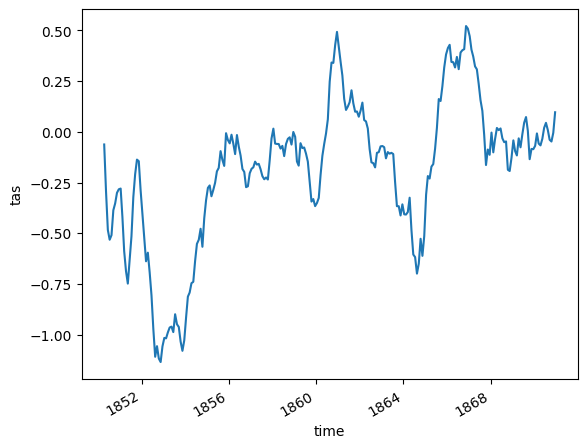

In [ ]:
ds_nino34 = ds_tas_anom.sel(lon=slice(170, 240), lat=slice(-5, 5)).mean(dim='lat').mean(dim='lon')
ds_nino34.plot()

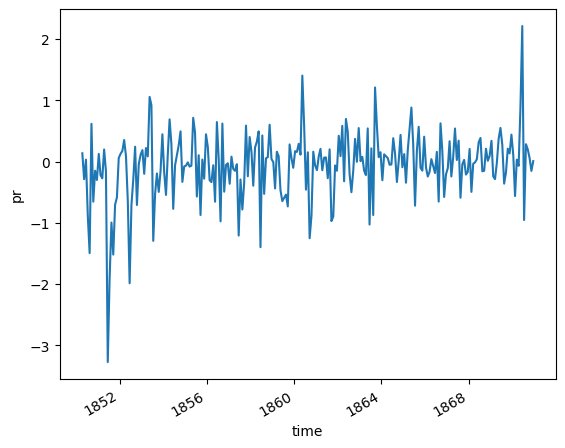

In [ ]:
ds_im = ds_pr_anom.sel(lon=slice(74.5, 86.5), lat=slice(16.5, 26.5)).mean(dim='lat').mean(dim='lon')
ds_im.plot()

In [ ]:
def iirfilter(x, N=4, cutoff=12., fs=12.):
    """
    Returns the forward-backward filtered signal using a Butterworth filter.
    """
    nyq = 0.5 * fs
    cutoff_normed = cutoff / nyq
    b, a = signal.butter(N, cutoff_normed, "low", analog=False)
    return  signal.filtfilt(b, a, x, padtype=None)

c = 3. / 4.                 # numerator of cutoff freq
cutoff_den = 12.
N = 1.                      # filter order of the Butterworth filter
fs = 12.                    # 12 samples per year
NSURR = 100
TAUMAX = 5.
CI_WD = 25.
cutoff_num = c
cut = cutoff_num / cutoff_den
nino_filt = iirfilter(ds_nino34.values, N=N, cutoff=cut, fs=fs)
ismr_filt = iirfilter(ds_im.values, N=N, cutoff=cut, fs=fs)

In [ ]:
def boxfilter(x, size=5, est="mean"):
    """Returns the box filter of array"""
    n = x.shape[0]
    if est == "mean":
        xf_pre = np.r_[x[0], [x[:i].mean() for i in range(1, size)]]
        xf_post = [np.mean(x[i-size:i]) for i in range(size, n)]
    elif est == "median":
        xf_pre = np.r_[x[0], [np.median(x[:i]) for i in range(1, size)]]
        xf_post = [np.median(x[i-size:i]) for i in range(size, n)]
    elif est == "max":
        xf_pre = np.r_[x[0], [np.max(x[:i]) for i in range(1, size)]]
        xf_post = [np.max(x[i-size:i]) for i in range(size, n)]
    xf = np.r_[xf_pre, xf_post]
    return xf

In [ ]:
nino_diff = np.diff(nino_filt, n=2)
nino_diff = np.r_[nino_diff[0], nino_diff[0], nino_diff]
ismr_diff = np.diff(ismr_filt, n=2)
ismr_diff = np.r_[ismr_diff[0], ismr_diff[0], ismr_diff]
nino_grad = boxfilter(nino_diff, size=12)
ismr_grad = boxfilter(ismr_diff, size=12)

In [ ]:
# compute the analytical signal using Hilbert transform
nino_anly = signal.hilbert(nino_grad)
ismr_anly = signal.hilbert(ismr_grad)
# nino_xi = np.zeros(nino_anly.shape).astype("bool")
# ismr_xi = np.zeros(ismr_anly.shape).astype("bool")
nino_xi = (nino_anly.real ** 2 + nino_anly.imag ** 2)
ismr_xi = (ismr_anly.real ** 2 + ismr_anly.imag ** 2)

In [ ]:
nino_phi = np.unwrap(np.angle(nino_anly))
ismr_phi = np.unwrap(np.angle(ismr_anly))
del_phi = nino_phi - ismr_phi

In [ ]:
ds_im['del_phi'] = (('time'), del_phi)

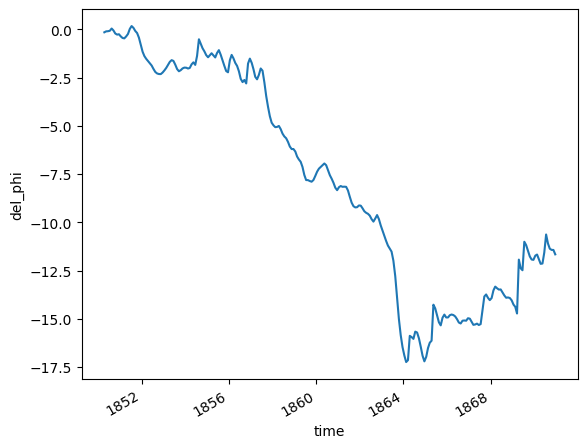

In [ ]:
ds_im.del_phi.plot()

In [ ]:
ds_pr_anom

<xarray.DataArray 'pr' (time: 249, lat: 64, lon: 128)>
dask.array<mul, shape=(249, 64, 128), dtype=float64, chunksize=(1, 64, 128), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1850-04-16 ... 1870-12-16T12:00:00
  * lat      (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 79.53 82.31 85.1 87.86
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
    month    (time) int64 4 5 6 7 8 9 10 11 12 1 2 ... 2 3 4 5 6 7 8 9 10 11 12

In [ ]:
ds_im_jjas = ds_im[ds_im['time.month'].isin([6, 7, 8, 9])].resample(time='Y').mean('time')

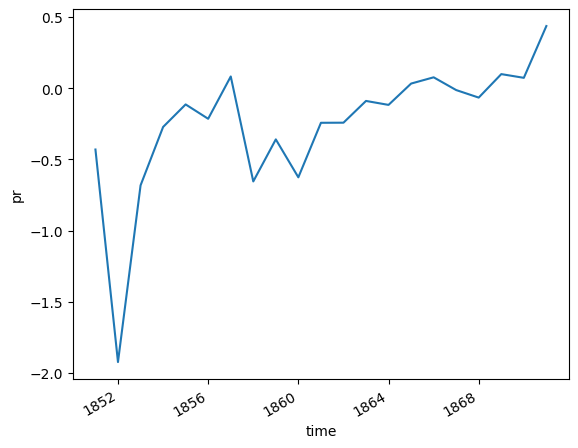

In [ ]:
ds_im_jjas.plot()

In [ ]:
ds_nino34_jjas = ds_nino34[ds_nino34['time.month'].isin([6, 7, 8, 9])].resample(time='Y').mean('time')

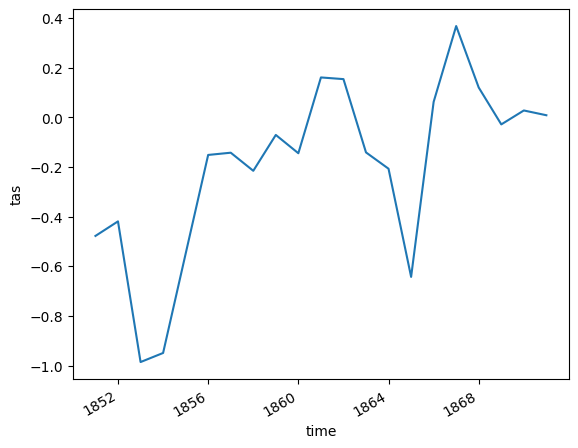

In [ ]:
ds_nino34_jjas.plot()

In [ ]:
ens = ['r10i1p1f2', 'r11i1p1f2', 'r12i1p1f2', 'r13i1p1f2', 'r14i1p1f2', 'r15i1p1f2', 'r16i1p1f2', 'r17i1p1f2', 'r18i1p1f2', 'r19i1p1f2', 'r1i1p1f2', 'r20i1p1f2', \
        'r21i1p1f2', 'r22i1p1f2', 'r23i1p1f2', 'r24i1p1f2', 'r25i1p1f2', 'r2i1p1f2', 'r3i1p1f2', 'r4i1p1f2', 'r5i1p1f2', 'r6i1p1f2', 'r7i1p1f2', 'r8i1p1f2', 'r9i1p1f2']

In [ ]:
for mem in ens:
    !wget http://esgf-data02.diasjp.net/thredds/fileServer/esg_dataroot/CMIP6/VolMIP/MIROC/MIROC-ES2L/volc-pinatubo-full/{mem}/Amon/pr/gn/v20210118/pr_Amon_MIROC-ES2L_volc-pinatubo-full_{mem}_gn_185006-185312.nc
    !wget http://esgf-data02.diasjp.net/thredds/fileServer/esg_dataroot/CMIP6/VolMIP/MIROC/MIROC-ES2L/volc-pinatubo-full/{mem}/Amon/tas/gn/v20210118/tas_Amon_MIROC-ES2L_volc-pinatubo-full_{mem}_gn_185006-185312.nc

--2023-09-05 17:09:27--  http://esgf-data02.diasjp.net/thredds/fileServer/esg_dataroot/CMIP6/VolMIP/MIROC/MIROC-ES2L/volc-pinatubo-full/r10i1p1f2/Amon/pr/gn/v20210118/pr_Amon_MIROC-ES2L_volc-pinatubo-full_r10i1p1f2_gn_185006-185312.nc
Resolving esgf-data02.diasjp.net (esgf-data02.diasjp.net)... 157.1.137.53
Connecting to esgf-data02.diasjp.net (esgf-data02.diasjp.net)|157.1.137.53|:80... connected.
HTTP request sent, awaiting response... 200 200
Length: 1173313 (1.1M) [application/x-netcdf]
Saving to: ‘pr_Amon_MIROC-ES2L_volc-pinatubo-full_r10i1p1f2_gn_185006-185312.nc’

pr_Amon_MIROC-ES2L_ 100%[===================>]   1.12M  1.15MB/s    in 1.0s    

2023-09-05 17:09:29 (1.15 MB/s) - ‘pr_Amon_MIROC-ES2L_volc-pinatubo-full_r10i1p1f2_gn_185006-185312.nc’ saved [1173313/1173313]

--2023-09-05 17:09:29--  http://esgf-data02.diasjp.net/thredds/fileServer/esg_dataroot/CMIP6/VolMIP/MIROC/MIROC-ES2L/volc-pinatubo-full/r10i1p1f2/Amon/tas/gn/v20210118/tas_Amon_MIROC-ES2L_volc-pinatubo-full_r10i1

In [ ]:
ds_pr_pinatubo  = xr.open_mfdataset('pr_Amon_MIROC-ES2L_volc-pinatubo-full*.nc', combine='nested', concat_dim='ensemble').mean(dim='ensemble')
ds_tas_pinatubo = xr.open_mfdataset('tas_Amon_MIROC-ES2L_volc-pinatubo-full*.nc', combine='nested', concat_dim='ensemble').mean(dim='ensemble')

In [ ]:
ds_pr_pinatubo_anom  = (ds_pr_pinatubo.pr.groupby('time.month') - pr_monthly_climatology)*86400
ds_tas_pinatubo_anom = ds_tas_pinatubo.tas.groupby('time.month') - tas_monthly_climatology

/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


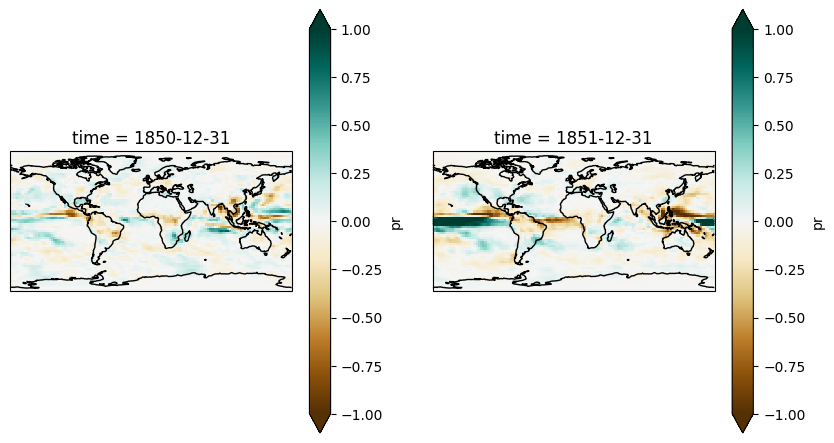

In [ ]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(ncols=2,nrows=1, figsize=(10,5.5), subplot_kw={'projection': ccrs.PlateCarree()})
ds_pr_pinatubo_anom.resample(time='Y').mean('time').isel(time=0).plot(cmap='BrBG', vmax=1, vmin=-1, extend='both', ax=ax[0])
ds_pr_pinatubo_anom.resample(time='Y').mean('time').isel(time=1).plot(cmap='BrBG', vmax=1, vmin=-1, extend='both', ax=ax[1])
for ax_ in ax:
    ax_.coastlines()

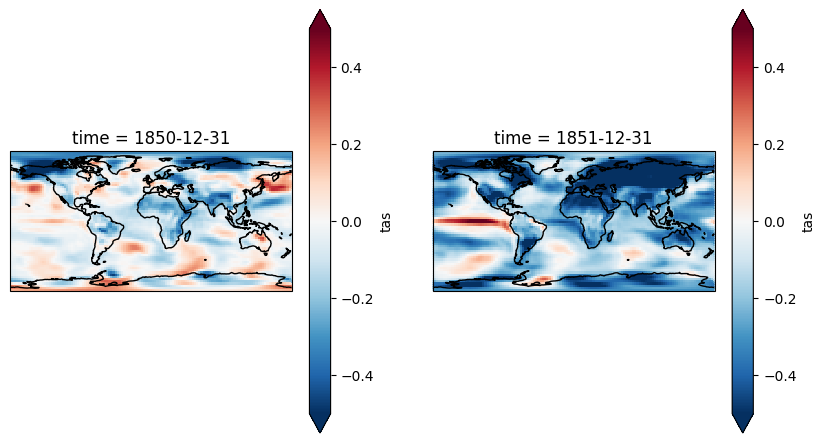

In [ ]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(ncols=2,nrows=1, figsize=(10,5.5), subplot_kw={'projection': ccrs.PlateCarree()})
ds_tas_pinatubo_anom.resample(time='Y').mean('time').isel(time=0).plot(vmax=0.5, vmin=-0.5, cmap='RdBu_r', extend='both', ax=ax[0])
ds_tas_pinatubo_anom.resample(time='Y').mean('time').isel(time=1).plot(vmax=0.5, vmin=-0.5, cmap='RdBu_r', extend='both', ax=ax[1])
for ax_ in ax:
    ax_.coastlines()

In [ ]:
ens = ['r10i1p1f2',
       'r11i1p1f2',
       'r12i1p1f2',
       'r13i1p1f2',
       'r14i1p1f2',
       'r15i1p1f2',
       'r16i1p1f2',
       'r17i1p1f2',
       'r18i1p1f2',
       'r19i1p1f2',
       'r1i1p1f2',
       'r20i1p1f2',
       'r21i1p1f2',
       'r22i1p1f2',
       'r23i1p1f2',
       'r24i1p1f2',
       'r25i1p1f2',
       'r2i1p1f2',
       'r3i1p1f2',
       'r4i1p1f2',
       'r5i1p1f2',
       'r6i1p1f2',
       'r7i1p1f2',
       'r8i1p1f2',
       'r9i1p1f2']

In [ ]:
for mem in ens:
    !wget http://esgf-data02.diasjp.net/thredds/fileServer/esg_dataroot/CMIP6/VolMIP/MIROC/MIROC-ES2L/volc-pinatubo-surf/{mem}/Amon/pr/gn/v20210317/pr_Amon_MIROC-ES2L_volc-pinatubo-surf_{mem}_gn_185006-185312.nc
    !wget http://esgf-data02.diasjp.net/thredds/fileServer/esg_dataroot/CMIP6/VolMIP/MIROC/MIROC-ES2L/volc-pinatubo-surf/{mem}/Amon/tas/gn/v20210317/tas_Amon_MIROC-ES2L_volc-pinatubo-surf_{mem}_gn_185006-185312.nc
    !wget http://esgf-data02.diasjp.net/thredds/fileServer/esg_dataroot/CMIP6/VolMIP/MIROC/MIROC-ES2L/volc-pinatubo-strat/{mem}/Amon/pr/gn/v20210118/pr_Amon_MIROC-ES2L_volc-pinatubo-strat_{mem}_gn_185006-185312.nc
    !wget http://esgf-data02.diasjp.net/thredds/fileServer/esg_dataroot/CMIP6/VolMIP/MIROC/MIROC-ES2L/volc-pinatubo-strat/{mem}/Amon/tas/gn/v20210118/tas_Amon_MIROC-ES2L_volc-pinatubo-strat_{mem}_gn_185006-185312.nc

--2023-09-05 17:11:56--  http://esgf-data02.diasjp.net/thredds/fileServer/esg_dataroot/CMIP6/VolMIP/MIROC/MIROC-ES2L/volc-pinatubo-surf/r10i1p1f2/Amon/pr/gn/v20210317/pr_Amon_MIROC-ES2L_volc-pinatubo-surf_r10i1p1f2_gn_185006-185312.nc
Resolving esgf-data02.diasjp.net (esgf-data02.diasjp.net)... 157.1.137.53
Connecting to esgf-data02.diasjp.net (esgf-data02.diasjp.net)|157.1.137.53|:80... connected.
HTTP request sent, awaiting response... 200 200
Length: 1172683 (1.1M) [application/x-netcdf]
Saving to: ‘pr_Amon_MIROC-ES2L_volc-pinatubo-surf_r10i1p1f2_gn_185006-185312.nc’

pr_Amon_MIROC-ES2L_ 100%[===================>]   1.12M  1.15MB/s    in 1.0s    

2023-09-05 17:11:57 (1.15 MB/s) - ‘pr_Amon_MIROC-ES2L_volc-pinatubo-surf_r10i1p1f2_gn_185006-185312.nc’ saved [1172683/1172683]

--2023-09-05 17:11:57--  http://esgf-data02.diasjp.net/thredds/fileServer/esg_dataroot/CMIP6/VolMIP/MIROC/MIROC-ES2L/volc-pinatubo-surf/r10i1p1f2/Amon/tas/gn/v20210317/tas_Amon_MIROC-ES2L_volc-pinatubo-surf_r10i1

In [ ]:
ds_pr_surf  = xr.open_mfdataset('pr_Amon_MIROC-ES2L_volc-pinatubo-surf*.nc', combine='nested', concat_dim='ensemble').mean(dim='ensemble')
ds_tas_surf = xr.open_mfdataset('tas_Amon_MIROC-ES2L_volc-pinatubo-surf*.nc', combine='nested', concat_dim='ensemble').mean(dim='ensemble')
ds_pr_strat  = xr.open_mfdataset('pr_Amon_MIROC-ES2L_volc-pinatubo-strat*.nc', combine='nested', concat_dim='ensemble').mean(dim='ensemble')
ds_tas_strat = xr.open_mfdataset('tas_Amon_MIROC-ES2L_volc-pinatubo-strat*.nc', combine='nested', concat_dim='ensemble').mean(dim='ensemble')

In [ ]:
ds_pr_surf_anom  = (ds_pr_surf.pr.groupby('time.month') - pr_monthly_climatology)*86400
ds_tas_surf_anom = ds_tas_surf.tas.groupby('time.month') - tas_monthly_climatology
ds_pr_strat_anom  = (ds_pr_strat.pr.groupby('time.month') - pr_monthly_climatology)*86400
ds_tas_strat_anom = ds_tas_strat.tas.groupby('time.month') - tas_monthly_climatology

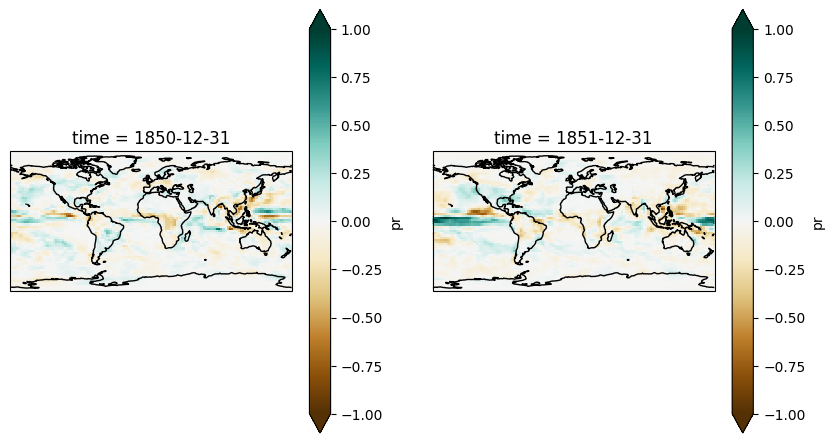

In [ ]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(ncols=2,nrows=1, figsize=(10,5.5), subplot_kw={'projection': ccrs.PlateCarree()})
ds_pr_surf_anom.resample(time='Y').mean('time').isel(time=0).plot(cmap='BrBG', vmax=1, vmin=-1, extend='both', ax=ax[0])
ds_pr_surf_anom.resample(time='Y').mean('time').isel(time=1).plot(cmap='BrBG', vmax=1, vmin=-1, extend='both', ax=ax[1])
for ax_ in ax:
    ax_.coastlines()

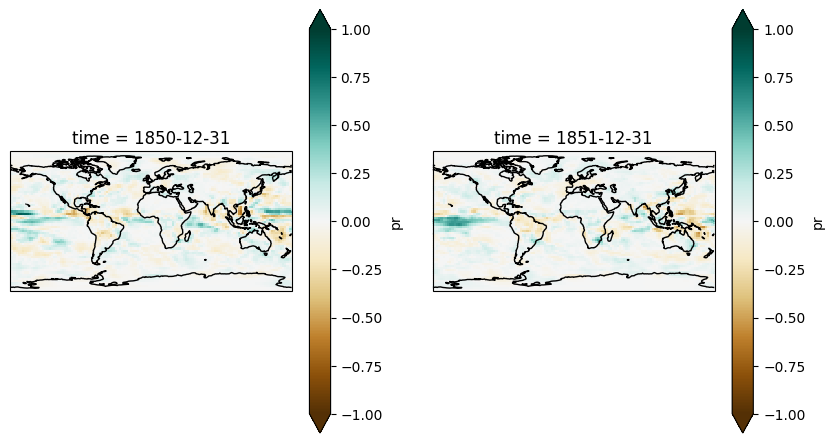

In [ ]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(ncols=2,nrows=1, figsize=(10,5.5), subplot_kw={'projection': ccrs.PlateCarree()})
ds_pr_strat_anom.resample(time='Y').mean('time').isel(time=0).plot(cmap='BrBG', vmax=1, vmin=-1, extend='both', ax=ax[0])
ds_pr_strat_anom.resample(time='Y').mean('time').isel(time=1).plot(cmap='BrBG', vmax=1, vmin=-1, extend='both', ax=ax[1])
for ax_ in ax:
    ax_.coastlines()

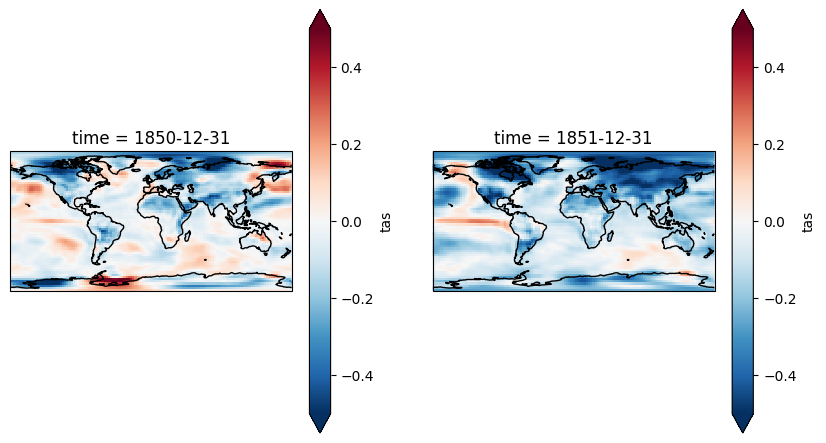

In [ ]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(ncols=2,nrows=1, figsize=(10,5.5), subplot_kw={'projection': ccrs.PlateCarree()})
ds_tas_surf_anom.resample(time='Y').mean('time').isel(time=0).plot(vmax=0.5, vmin=-0.5, cmap='RdBu_r', extend='both', ax=ax[0])
ds_tas_surf_anom.resample(time='Y').mean('time').isel(time=1).plot(vmax=0.5, vmin=-0.5, cmap='RdBu_r', extend='both', ax=ax[1])
for ax_ in ax:
    ax_.coastlines()

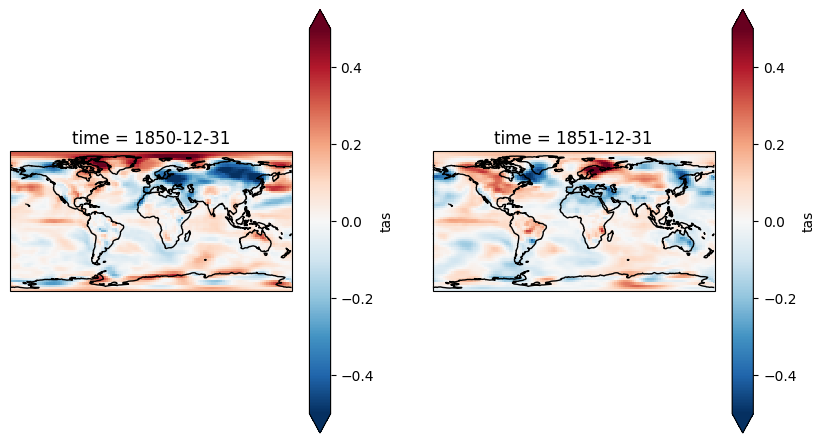

In [ ]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(ncols=2,nrows=1, figsize=(10,5.5), subplot_kw={'projection': ccrs.PlateCarree()})
ds_tas_strat_anom.resample(time='Y').mean('time').isel(time=0).plot(vmax=0.5, vmin=-0.5, cmap='RdBu_r', extend='both', ax=ax[0])
ds_tas_strat_anom.resample(time='Y').mean('time').isel(time=1).plot(vmax=0.5, vmin=-0.5, cmap='RdBu_r', extend='both', ax=ax[1])
for ax_ in ax:
    ax_.coastlines()

In [ ]:
ds_tas_strat_anom.resample(time='Y').mean('time')

<xarray.DataArray 'tas' (time: 4, lat: 64, lon: 128)>
dask.array<stack, shape=(4, 64, 128), dtype=float32, chunksize=(1, 64, 128), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 79.53 82.31 85.1 87.86
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * time     (time) datetime64[ns] 1850-12-31 1851-12-31 1852-12-31 1853-12-31